# Creating Group Boxplots in Python

Follow me on [Twitter](https://twitter.com/javedali99)

In [4]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import random
from datetime import date

import warnings
warnings.filterwarnings('ignore')

### 1. Using colors to differentiate between categories and spacing to separate in groups.

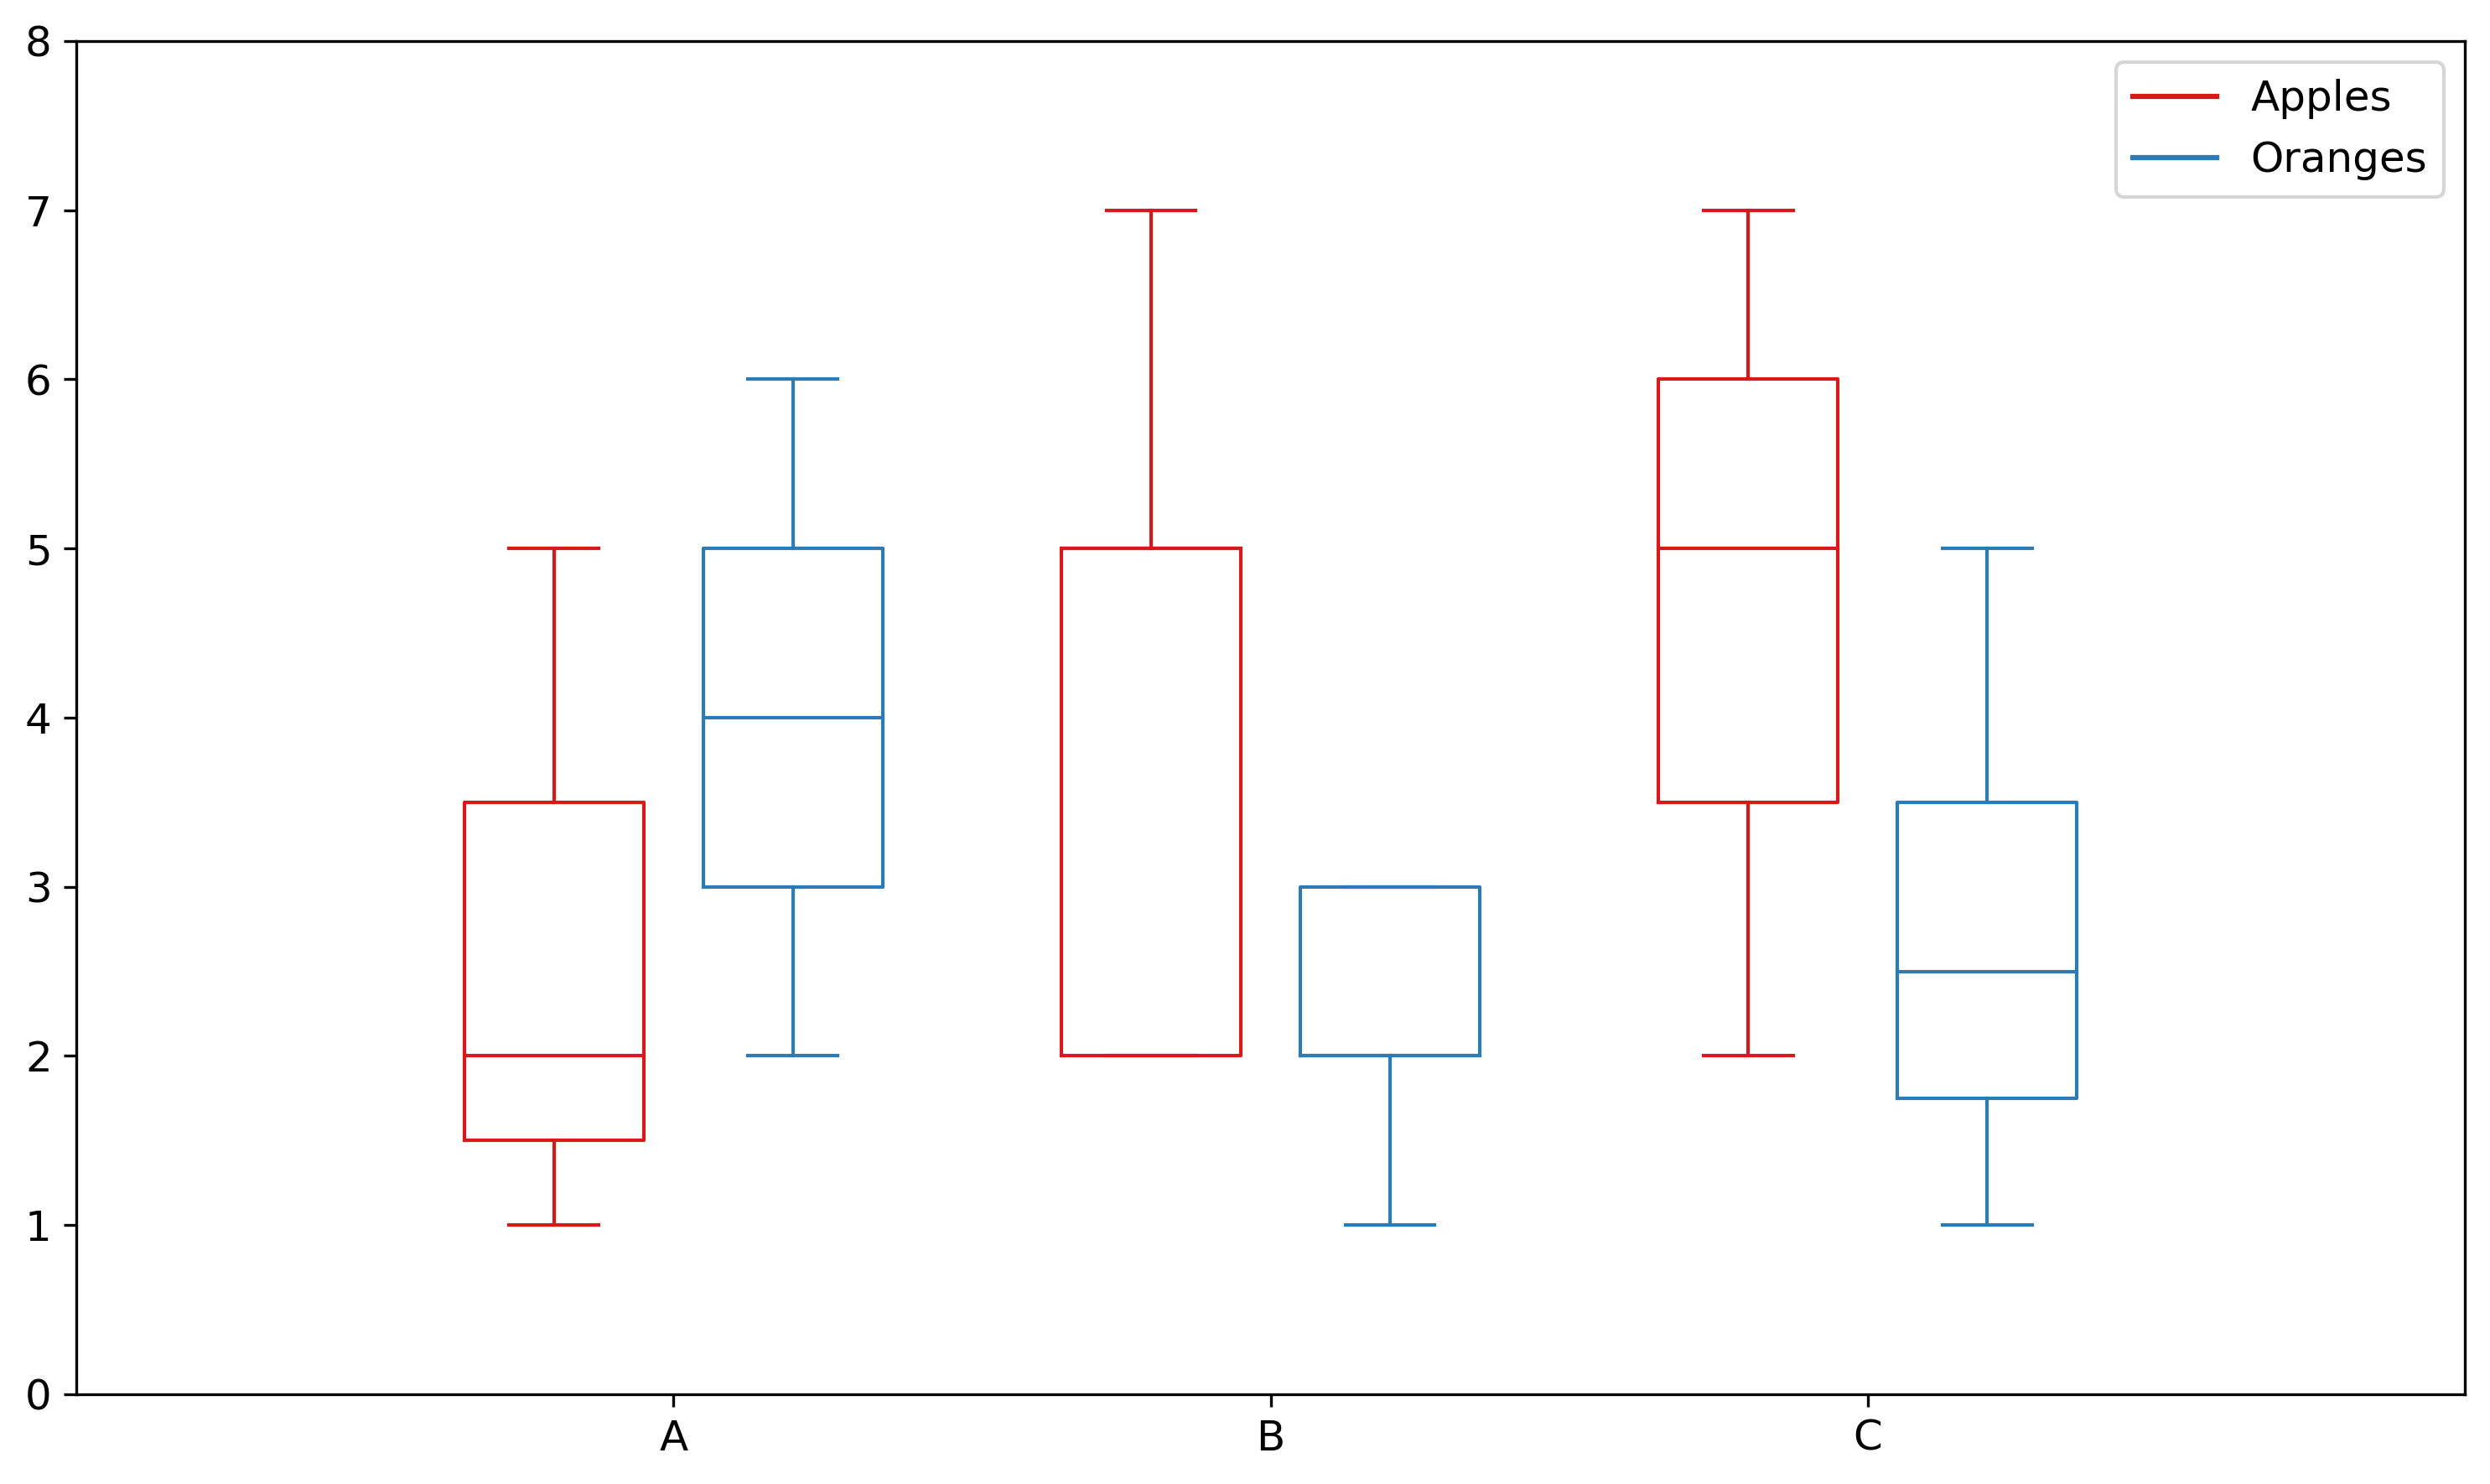

In [13]:
# create dummy data
data_a = [[1, 2, 5], [5, 7, 2, 2, 5], [7, 2, 5]]
data_b = [[6, 4, 2], [1, 2, 5, 3, 2], [2, 3, 5, 1]]

ticks = ['A', 'B', 'C']


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


plt.figure(figsize=(10, 6), dpi=300)

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)

set_box_color(bpl, '#D7191C')  # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend(loc='best', fontsize=12)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()
# plt.savefig('boxcompare.png') # uncomment for saving the figure
plt.show()

### 2. A simple way to plot group boxplots by using `pandas`

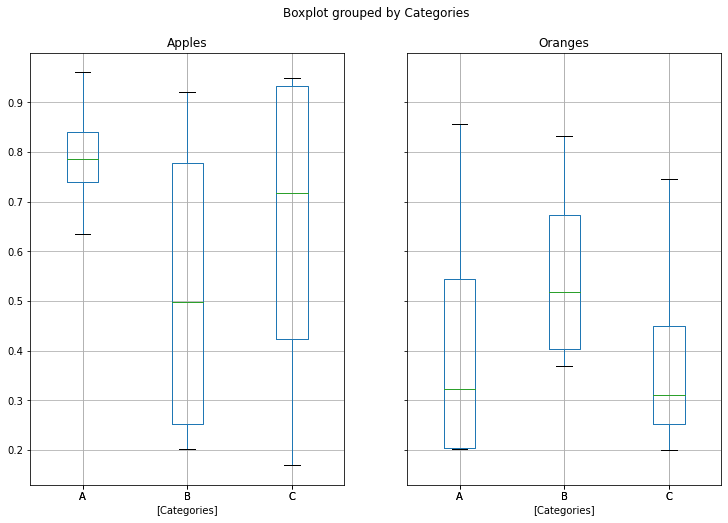

In [19]:
df = pd.DataFrame(np.random.rand(12,2), columns=['Apples', 'Oranges'] )

df['Categories'] = pd.Series(list('AAAABBBBCCCC'))

df.boxplot(by='Categories', figsize=(12, 8))

plt.show()

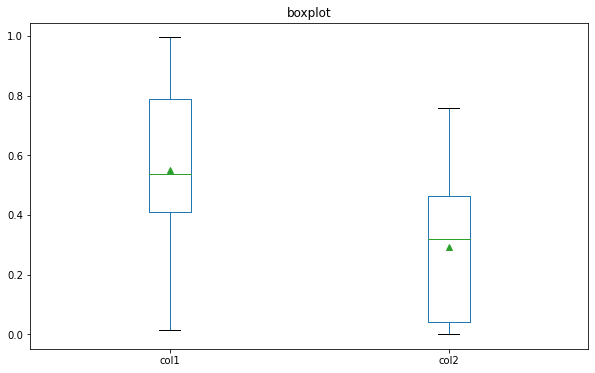

In [47]:
col1 = np.random.random(10)
col2 = np.random.random(10)

DF = pd.DataFrame({'col1': col1, 'col2': col2})

ax = DF[['col1', 'col2']].plot(kind='box', title='boxplot', showmeans=True, figsize=(10, 6))

plt.show()

### 3. We can also use the `seaborn` library for boxplots. First melt the dataframe to format data and then create the boxplot of your choice

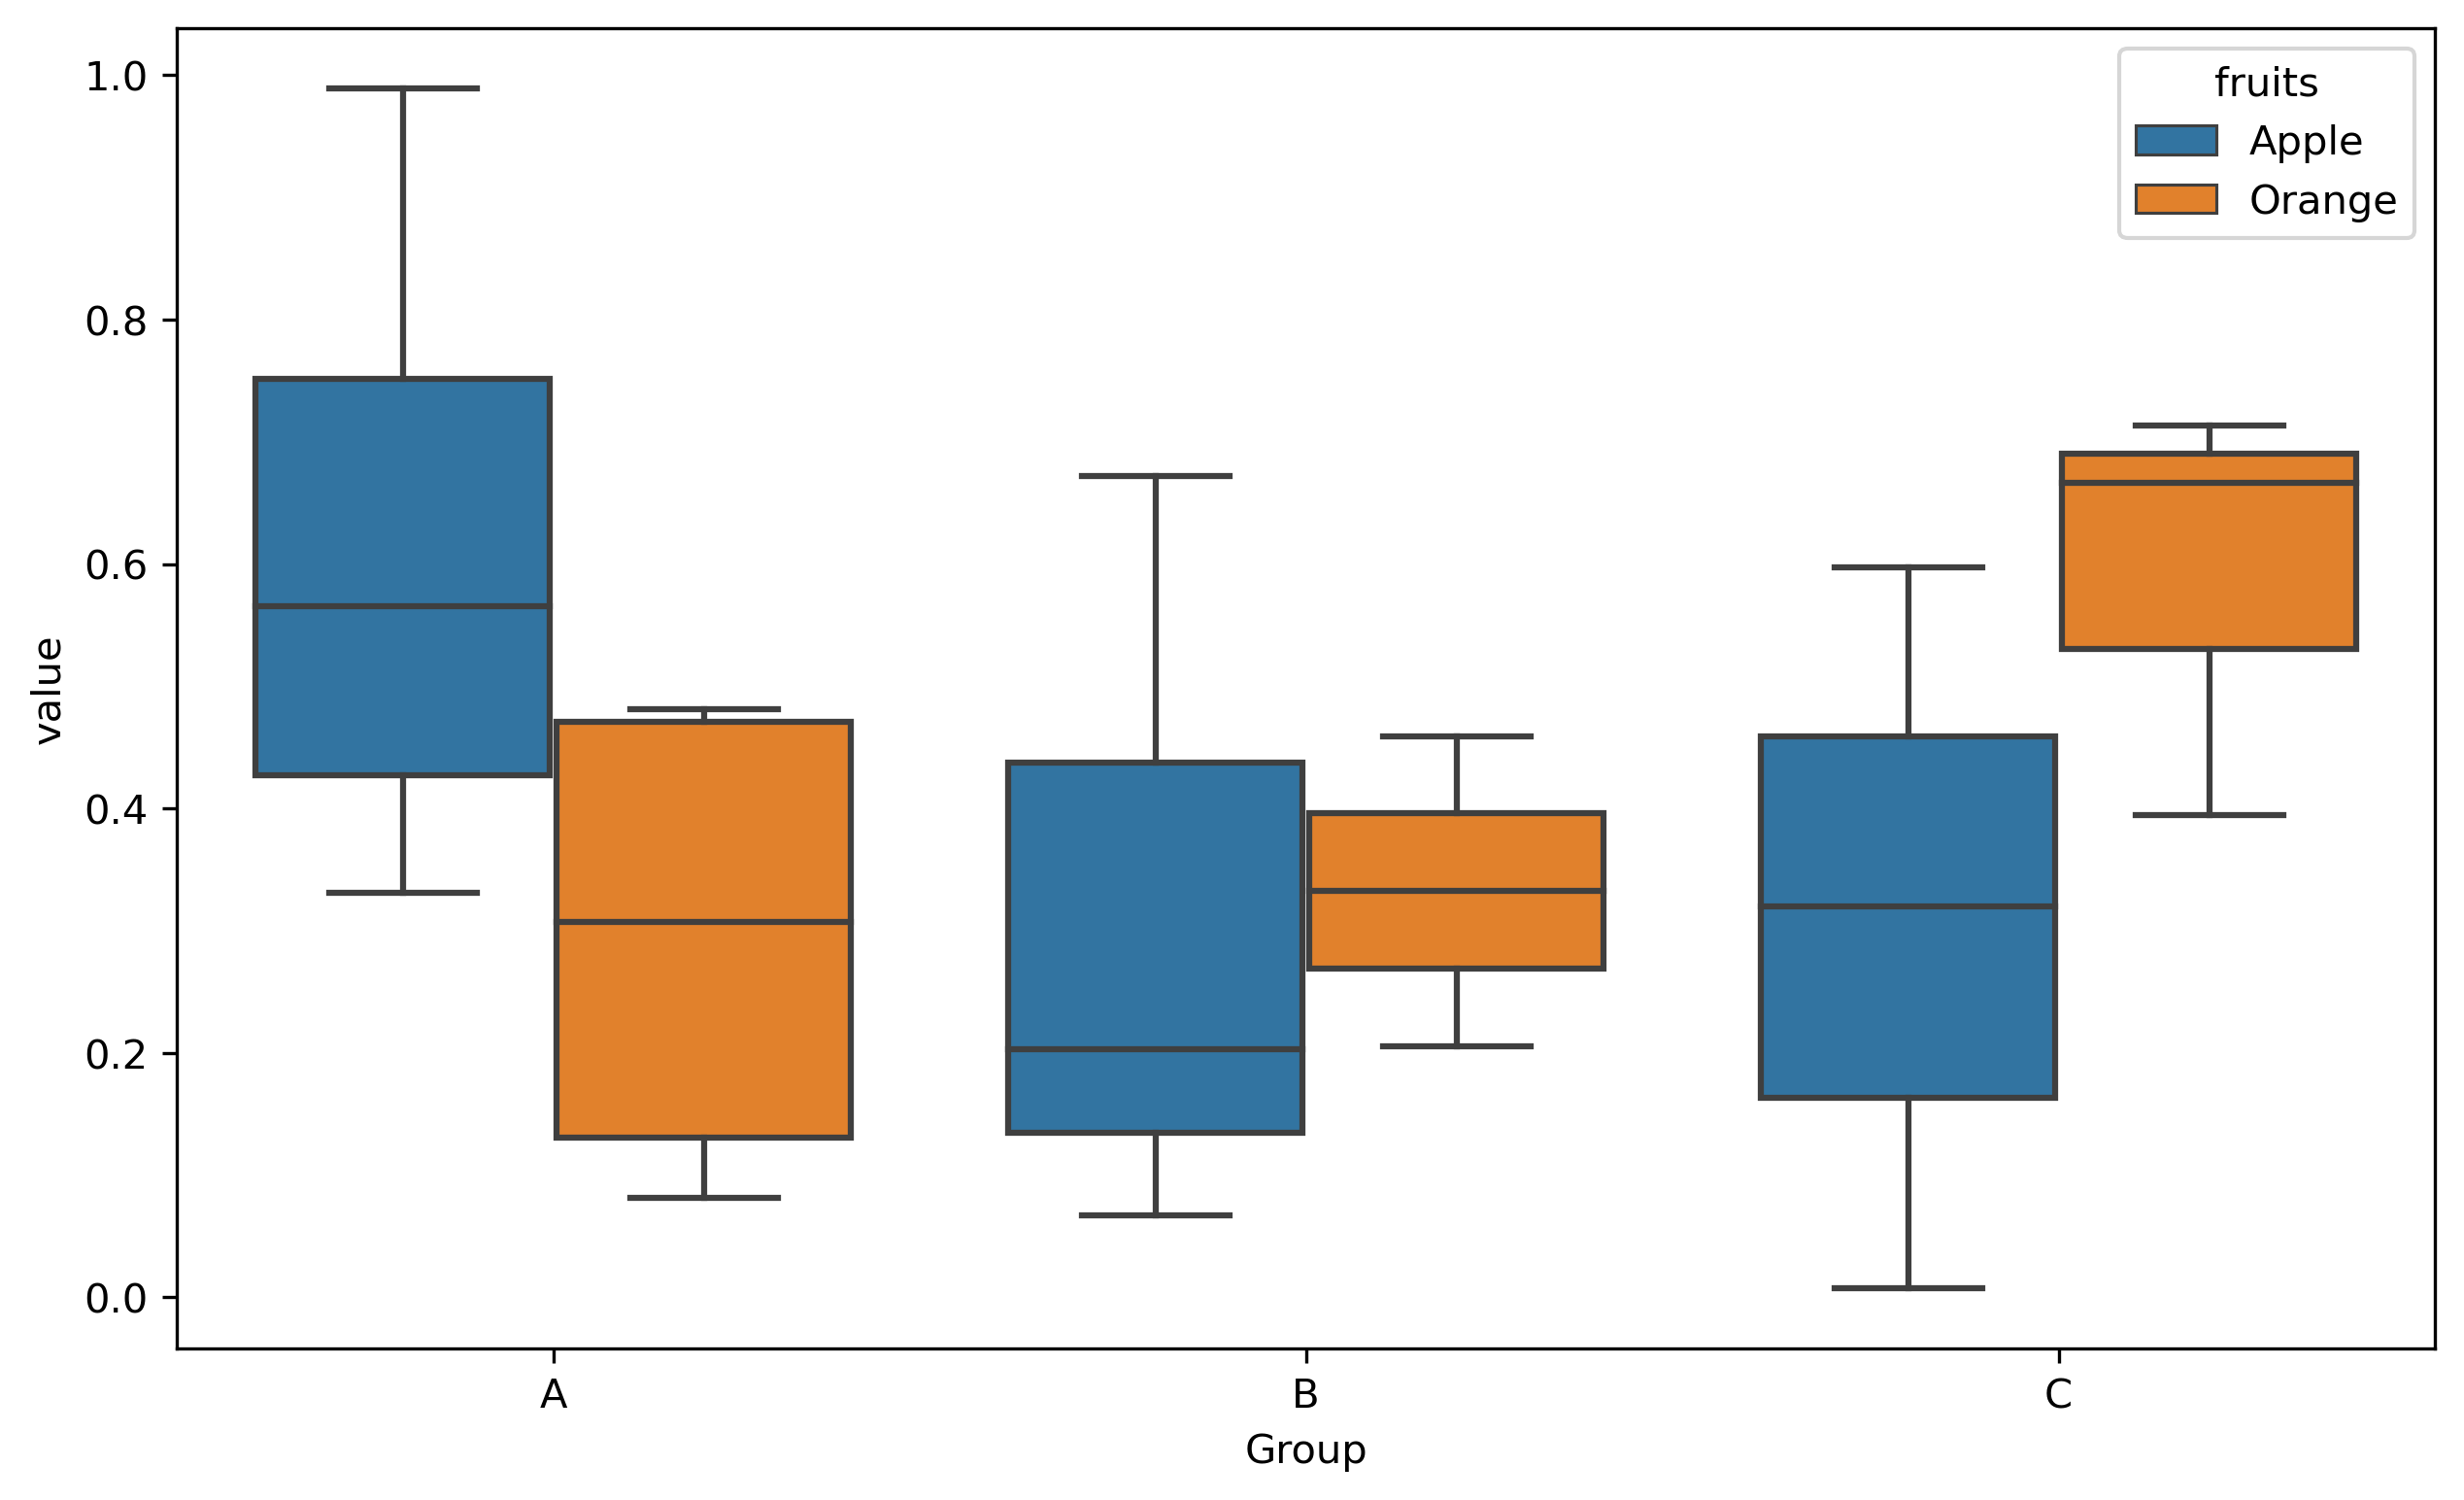

In [21]:
# data
df = pd.DataFrame({'Group': ['A', 'A', 'A', 'B', 'C', 'B', 'B', 'C', 'A', 'C'],
                   'Apple': np.random.rand(10), 'Orange': np.random.rand(10)})
df = df[['Group', 'Apple', 'Orange']]

dd = pd.melt(df, id_vars=['Group'], value_vars=[
             'Apple', 'Orange'], var_name='fruits')

# viz
plt.figure(figsize=(10, 6), dpi=300)

sns.boxplot(x='Group', y='value', data=dd, hue='fruits')

plt.show()

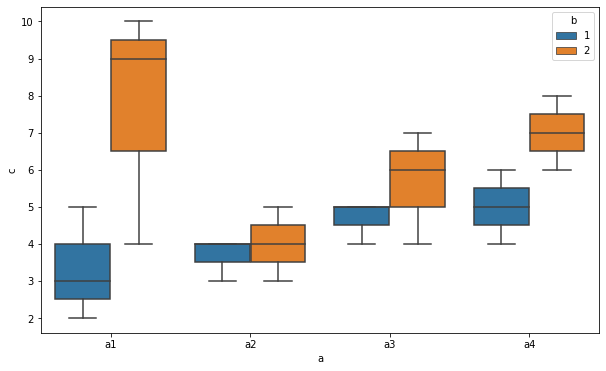

In [53]:
df = pd.DataFrame(
    [
        [2, 4, 5, 6, 1],
        [4, 5, 6, 7, 2],
        [5, 4, 5, 5, 1],
        [10, 4, 7, 8, 2],
        [9, 3, 4, 6, 2],
        [3, 3, 4, 4, 1]
    ], columns=['a1', 'a2', 'a3', 'a4', 'b'])

df_long = pd.melt(df, "b", var_name="a", value_name="c")

plt.figure(figsize=(10, 6))
sns.boxplot(x="a", hue="b", y="c", data=df_long)

plt.show()

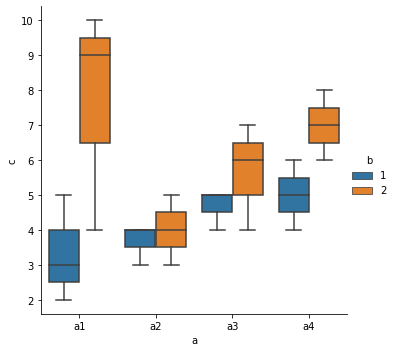

In [57]:
sns.factorplot("a", hue="b", y="c", data=df_long, kind="box")

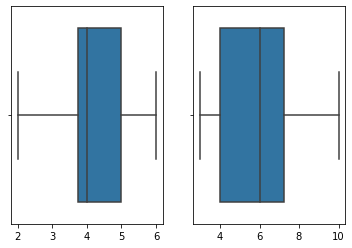

In [59]:
fig, ax = plt.subplots(1, 2, sharey=True)

for i, grp in enumerate(df.filter(regex="a").groupby(by=df.b)):
    sns.boxplot(grp[1], ax=ax[i])

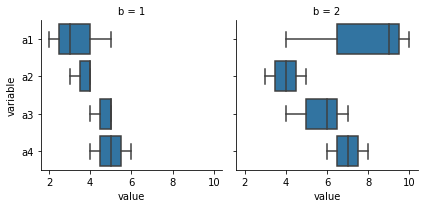

In [60]:
g = sns.FacetGrid(pd.melt(df, id_vars='b'), col='b')
g.map(sns.boxplot, 'value', 'variable')

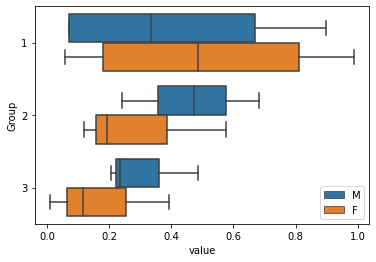

In [68]:
df = pd.DataFrame({'Group': [1, 1, 1, 2, 3, 2, 2, 3, 1, 3],
                   'M': np.random.rand(10), 'F': np.random.rand(10)})
df = df[['Group', 'M', 'F']]

dd = pd.melt(df, id_vars=['Group'], value_vars=['M', 'F'], var_name='sex')

sns.boxplot(y='Group', x='value', data=dd, orient="h", hue='sex')

plt.legend(loc='best')

plt.show()

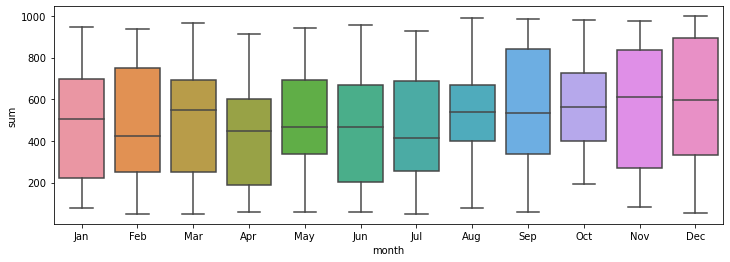

In [2]:
# plot a seaborn boxplot with month as x-axes with a daily dataset

df = pd.DataFrame(np.random.randint(50, 1000, 365).reshape(-1, 1),
                  index=pd.date_range('2018-01-01', '2018-12-31', freq='D'),
                  columns=['sum'])
df.reset_index(inplace=True)
df.columns = ['Date', 'sum']

# use dt.strftime('%b') element to create the month column
df['month'] = df['Date'].dt.strftime('%b')

# Use seaborn.boxplot
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_size_inches((12, 4))
sns.boxplot(x='month', y='sum', data=df, ax=ax)
plt.show()

### 4. A more elegant way to change the color of the box plot by iterating over the dictionary of the object itself

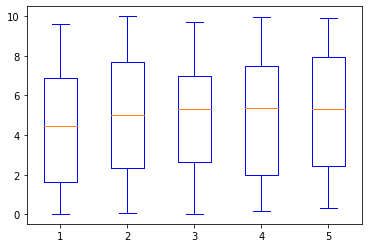

In [25]:
def color_box(bp, color):

    # Define the elements to color. You can also add medians, fliers and means
    elements = ['boxes', 'caps', 'whiskers']

    # Iterate over each of the elements changing the color
    for elem in elements:
        [plt.setp(bp[elem][idx], color=color) for idx in range(len(bp[elem]))]
    return


a = np.random.uniform(0, 10, [100, 5])

bp = plt.boxplot(a)
color_box(bp, 'blue')

### 5. A function to make slightly fancier grouped boxplots

In [27]:
def custom_legend(colors, labels, linestyles=None):
    """ Creates a list of matplotlib Patch objects that can be passed to the legend(...) function to create a custom
        legend.

    :param colors: A list of colors, one for each entry in the legend. You can also include a linestyle, for example: 'k--'
    :param labels:  A list of labels, one for each entry in the legend.
    """

    if linestyles is not None:
        assert len(linestyles) == len(
            colors), "Length of linestyles must match length of colors."

    h = list()
    for k, (c, l) in enumerate(zip(colors, labels)):
        clr = c
        ls = 'solid'
        if linestyles is not None:
            ls = linestyles[k]
        patch = patches.Patch(color=clr, label=l, linestyle=ls)
        h.append(patch)
    return h


def grouped_boxplot(data, group_names=None, subgroup_names=None, ax=None, subgroup_colors=None,
                    box_width=0.6, box_spacing=1.0):
    """ Draws a grouped boxplot. The data should be organized in a hierarchy, where there are multiple
        subgroups for each main group.

    :param data: A dictionary of length equal to the number of the groups. The key should be the
                group name, the value should be a list of arrays. The length of the list should be
                equal to the number of subgroups.
    :param group_names: (Optional) The group names, should be the same as data.keys(), but can be ordered.
    :param subgroup_names: (Optional) Names of the subgroups.
    :param subgroup_colors: A list specifying the plot color for each subgroup.
    :param ax: (Optional) The axis to plot on.
    """

    if group_names is None:
        group_names = data.keys()

    if ax is None:
        ax = plt.gca()
    plt.sca(ax)

    nsubgroups = np.array([len(v) for v in data.values()])
    assert len(np.unique(nsubgroups)
               ) == 1, "Number of subgroups for each property differ!"
    nsubgroups = nsubgroups[0]

    if subgroup_colors is None:
        subgroup_colors = list()
        for k in range(nsubgroups):
            subgroup_colors.append(np.random.rand(3))
    else:
        assert len(
            subgroup_colors) == nsubgroups, "subgroup_colors length must match number of subgroups (%d)" % nsubgroups

    def _decorate_box(_bp, _d):
        plt.setp(_bp['boxes'], lw=0, color='k')
        plt.setp(_bp['whiskers'], lw=3.0, color='k')

        # fill in each box with a color
        assert len(_bp['boxes']) == nsubgroups
        for _k, _box in enumerate(_bp['boxes']):
            _boxX = list()
            _boxY = list()
            for _j in range(5):
                _boxX.append(_box.get_xdata()[_j])
                _boxY.append(_box.get_ydata()[_j])
            _boxCoords = zip(_boxX, _boxY)
            _boxPolygon = plt.Polygon(
                _boxCoords, facecolor=subgroup_colors[_k])
            ax.add_patch(_boxPolygon)

        # draw a black line for the median
        for _k, _med in enumerate(_bp['medians']):
            _medianX = list()
            _medianY = list()
            for _j in range(2):
                _medianX.append(_med.get_xdata()[_j])
                _medianY.append(_med.get_ydata()[_j])
                plt.plot(_medianX, _medianY, 'k', linewidth=3.0)

            # draw a black asterisk for the mean
            plt.plot([np.mean(_med.get_xdata())], [np.mean(_d[_k])], color='w', marker='*',
                     markeredgecolor='k', markersize=12)

    cpos = 1
    label_pos = list()
    for k in group_names:
        d = data[k]
        nsubgroups = len(d)
        pos = np.arange(nsubgroups) + cpos
        label_pos.append(pos.mean())
        bp = plt.boxplot(d, positions=pos, widths=box_width)
        _decorate_box(bp, d)
        cpos += nsubgroups + box_spacing

    plt.xlim(0, cpos-1)
    plt.xticks(label_pos, group_names)

    if subgroup_names is not None:
        leg = custom_legend(subgroup_colors, subgroup_names)
        plt.legend(handles=leg)

In [30]:
# create random data
data = {'A': [np.random.randn(100), np.random.randn(100) + 5],
        'B': [np.random.randn(100)+1, np.random.randn(100) + 9],
        'C': [np.random.randn(100)-3, np.random.randn(100) - 5]
        }

# data viz
grouped_boxplot(data, group_names=['A', 'B', 'C'], subgroup_names=[
                'Apples', 'Oranges'], subgroup_colors=['#D02D2E', '#D67700'])
plt.show()

### 6. Grouped boxplots, towards subtle academic publication styling

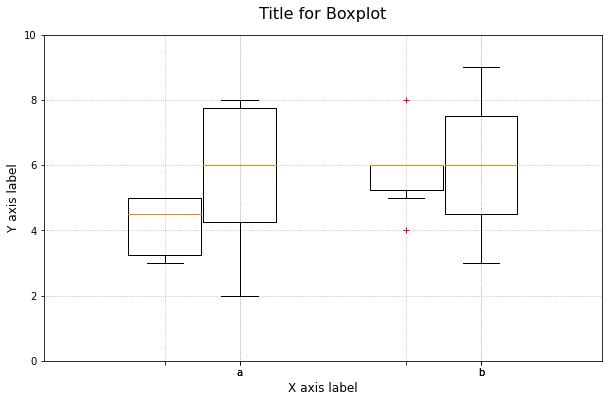

In [39]:
# data, e.g. results per algorithm:
data1 = [5, 5, 4, 3, 3, 5]
data2 = [6, 6, 4, 6, 8, 5]
data3 = [7, 8, 4, 5, 8, 2]
data4 = [6, 9, 3, 6, 8, 4]

# Combining the data:
data_group1 = [data1, data2]
data_group2 = [data3, data4]

# Labels for the data:
labels_list = ['a', 'b']
xlocations = range(len(data_group1))
width = 0.3
symbol = 'r+'
ymin = 0
ymax = 10

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.set_xticklabels(labels_list, rotation=0)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('X axis label', fontsize=12)
plt.ylabel('Y axis label', fontsize=12)
plt.title('Title for Boxplot', fontsize=16, y=1.03)

# Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1,
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1,
            widths=width,
            #           notch=False,
            #           vert=True,
            #           whis=1.5,
            #           bootstrap=None,
            #           usermedians=None,
            #           conf_intervals=None,
            #           patch_artist=False,
            )

plt.boxplot(data_group2,
            labels=labels_list,
            sym=symbol,
            positions=positions_group2,
            widths=width,
            #           notch=False,
            #           vert=True,
            #           whis=1.5,
            #           bootstrap=None,
            #           usermedians=None,
            #           conf_intervals=None,
            #           patch_artist=False,
            )

# plt.savefig('boxplot_grouped.png', dpi=300)   # uncomment for saving the plots
# plt.savefig('boxplot_grouped.pdf', dpi=300)    # when publishing, use high quality PDFs
plt.show()                   

### 7. A flexible generic solution with `matplotlib`

-1.0
0.0
1.0


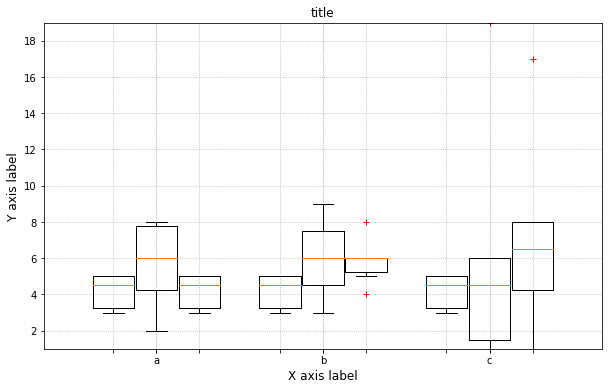

In [44]:
# data, e.g. results per algorithm:
data1 = [5, 5, 4, 3, 3, 5]
data2 = [6, 6, 4, 6, 8, 5]
data3 = [7, 8, 4, 5, 8, 2]
data4 = [6, 9, 3, 6, 8, 4]
data6 = [17, 8, 4, 5, 8, 1]
data7 = [6, 19, 3, 6, 1, 1]


# Combining the data:
data_group1 = [data1, data2, data6]
data_group2 = [data3, data4, data7]
data_group3 = [data1, data1, data1]
data_group4 = [data2, data2, data2]
data_group5 = [data2, data2, data2]

# , data_group4] #, data_group5]
data_groups = [data_group1, data_group2, data_group3]

# Labels for the data:
labels_list = ['a', 'b', 'c']
width = 0.3
xlocations = [x*((1 + len(data_groups))*width)
              for x in range(len(data_group1))]

symbol = 'r+'
ymin = min([val for dg in data_groups for data in dg for val in data])
ymax = max([val for dg in data_groups for data in dg for val in data])

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_ylim(ymin, ymax)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

plt.xlabel('X axis label', fontsize=12)
plt.ylabel('Y axis label', fontsize=12)
plt.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2


ax.set_xticks(xlocations)
ax.set_xticklabels(labels_list, rotation=0)

# Offset the positions per group:
group_positions = []
for num, dg in enumerate(data_groups):
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x-_off*(width+0.01) for x in xlocations])

for dg, pos in zip(data_groups, group_positions):
    plt.boxplot(dg,
               sym=symbol,
               #            labels=['']*len(labels_list),
               labels=['']*len(labels_list),
               positions=pos,
               widths=width,
               #           notch=False,
               #           vert=True,
               #           whis=1.5,
               #           bootstrap=None,
               #           usermedians=None,
               #           conf_intervals=None,
               #           patch_artist=False,
               )

plt.show()

### 8. To plot multiple boxplots on one `matplotlib` graph, pass a list of data arrays to boxplot

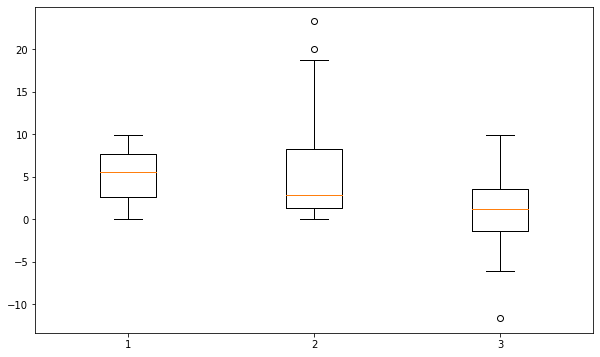

In [50]:
x1 = 10*np.random.random(100)
x2 = 10*np.random.exponential(0.5, 100)
x3 = 10*np.random.normal(0, 0.4, 100)

plt.figure(figsize=(10, 6))
plt.boxplot([x1, x2, x3])
plt.show()

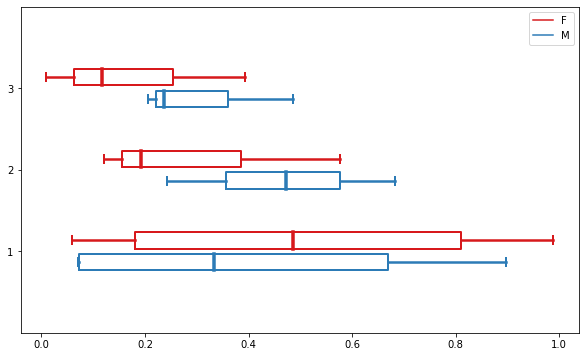

In [73]:
Groups = [1, 2, 3]
Columns = df.columns.tolist()[1:]
Mgroups = []
Fgroups = []

for g in Groups:
    dfgc = df[df['Group'] == g]
    m = dfgc['M'].dropna()
    f = dfgc['F'].dropna()
    Mgroups.append(m.tolist())
    Fgroups.append(f.tolist())

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()


def setBoxColors(bp, cl):
    plt.setp(bp['boxes'], color=cl, linewidth=2.)
    plt.setp(bp['whiskers'], color=cl, linewidth=2.5)
    plt.setp(bp['caps'], color=cl, linewidth=2)
    plt.setp(bp['medians'], color=cl, linewidth=3.5)


bpl = plt.boxplot(Mgroups, positions=np.array(range(len(Mgroups)))
                  * 3.0-0.4, vert=False, whis='range', sym='', widths=0.6)
bpr = plt.boxplot(Fgroups, positions=np.array(range(len(Fgroups)))
                  * 3.0+0.4, vert=False, whis='range', sym='', widths=0.6)

setBoxColors(bpr, '#D7191C')  # colors are from http://colorbrewer2.org/
setBoxColors(bpl, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='F')
plt.plot([], c='#2C7BB6', label='M')
plt.legend()

plt.yticks(range(0, len(Groups) * 3, 3), Groups)
plt.ylim(-3, len(Groups)*3)
#plt.xlim(0, 8)
plt.show()

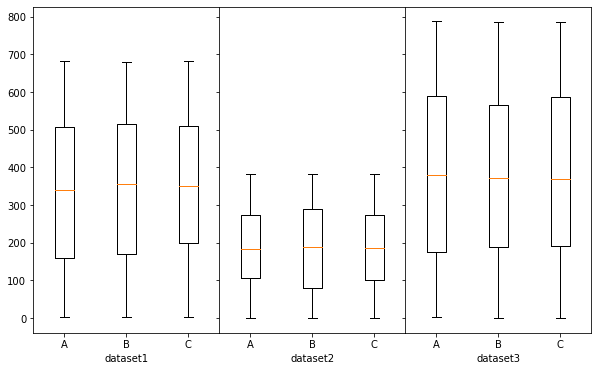

In [79]:
data = {}
data['dataset1'] = {}
data['dataset2'] = {}
data['dataset3'] = {}

n = 500
for k, v in data.items():
    upper = random.randint(0, 1000)
    v['A'] = np.random.uniform(0, upper, size=n)
    v['B'] = np.random.uniform(0, upper, size=n)
    v['C'] = np.random.uniform(0, upper, size=n)

fig, axes = plt.subplots(ncols=3, sharey=True, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

for ax, name in zip(axes, ['dataset1', 'dataset2', 'dataset3']):
    ax.boxplot([data[name][item] for item in ['A', 'B', 'C']])
    ax.set(xticklabels=['A', 'B', 'C'], xlabel=name)
    ax.margins(0.05)  # Optional

plt.show()